# 1. Data Exploration:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tytanic_train = pd.read_csv('/content/Titanic_train.csv')
tytanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tytanic_test = pd.read_csv('/content/Titanic_test.csv')
tytanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


dy seeing the data we can understand that there is no survival column in the test data which means they are asking to predict the survival of a preson based on the other independent variable mostly how machine predicting values on unseen data

In [ ]:
tytanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


as we see there are missing values so we will fill them with appropriate values using mean median etc if we see cabin there are more than half of data is missing so droping it will be best and there are few columns which are not use full to predict survival rate so dropping them and replacing male and femail with 0 and 1 and for embarked using one hot encoding

In [ ]:
# Drop unnecessary columns
tytanic_train = tytanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing Age with median
tytanic_train['Age'] = tytanic_train['Age'].fillna(tytanic_train['Age'].median())

# Fill missing Embarked with mode
tytanic_train['Embarked'] = tytanic_train['Embarked'].fillna(tytanic_train['Embarked'].mode()[0])

# Convert 'Sex' to numeric
tytanic_train['Sex'] = tytanic_train['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
tytanic_train = pd.get_dummies(tytanic_train, columns=['Embarked'], drop_first=True , dtype = int)

print(tytanic_train.head())
print(tytanic_train.info())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500           0           1
1         1       1    1  38.0      1      0  71.2833           0           0
2         1       3    1  26.0      0      0   7.9250           0           1
3         1       1    1  35.0      1      0  53.1000           0           1
4         0       3    0  35.0      0      0   8.0500           0           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  8

we have conformed that data is in good format now we will see the statistical summery of each column

In [ ]:
tytanic_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


now let us visualize the data

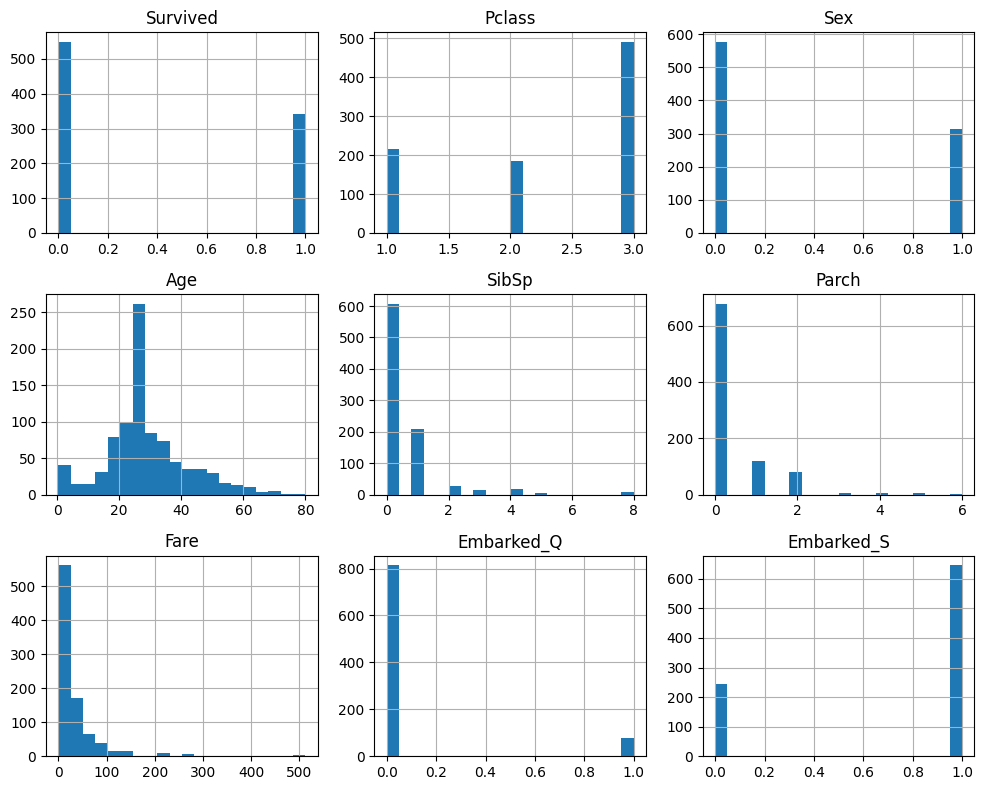

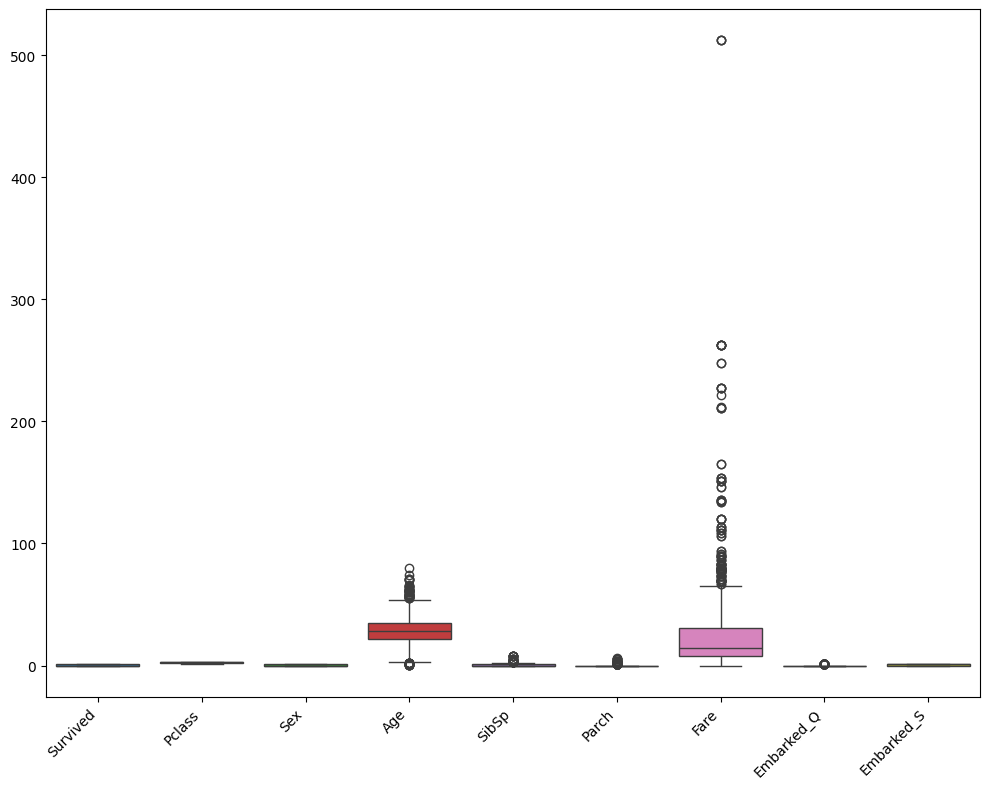

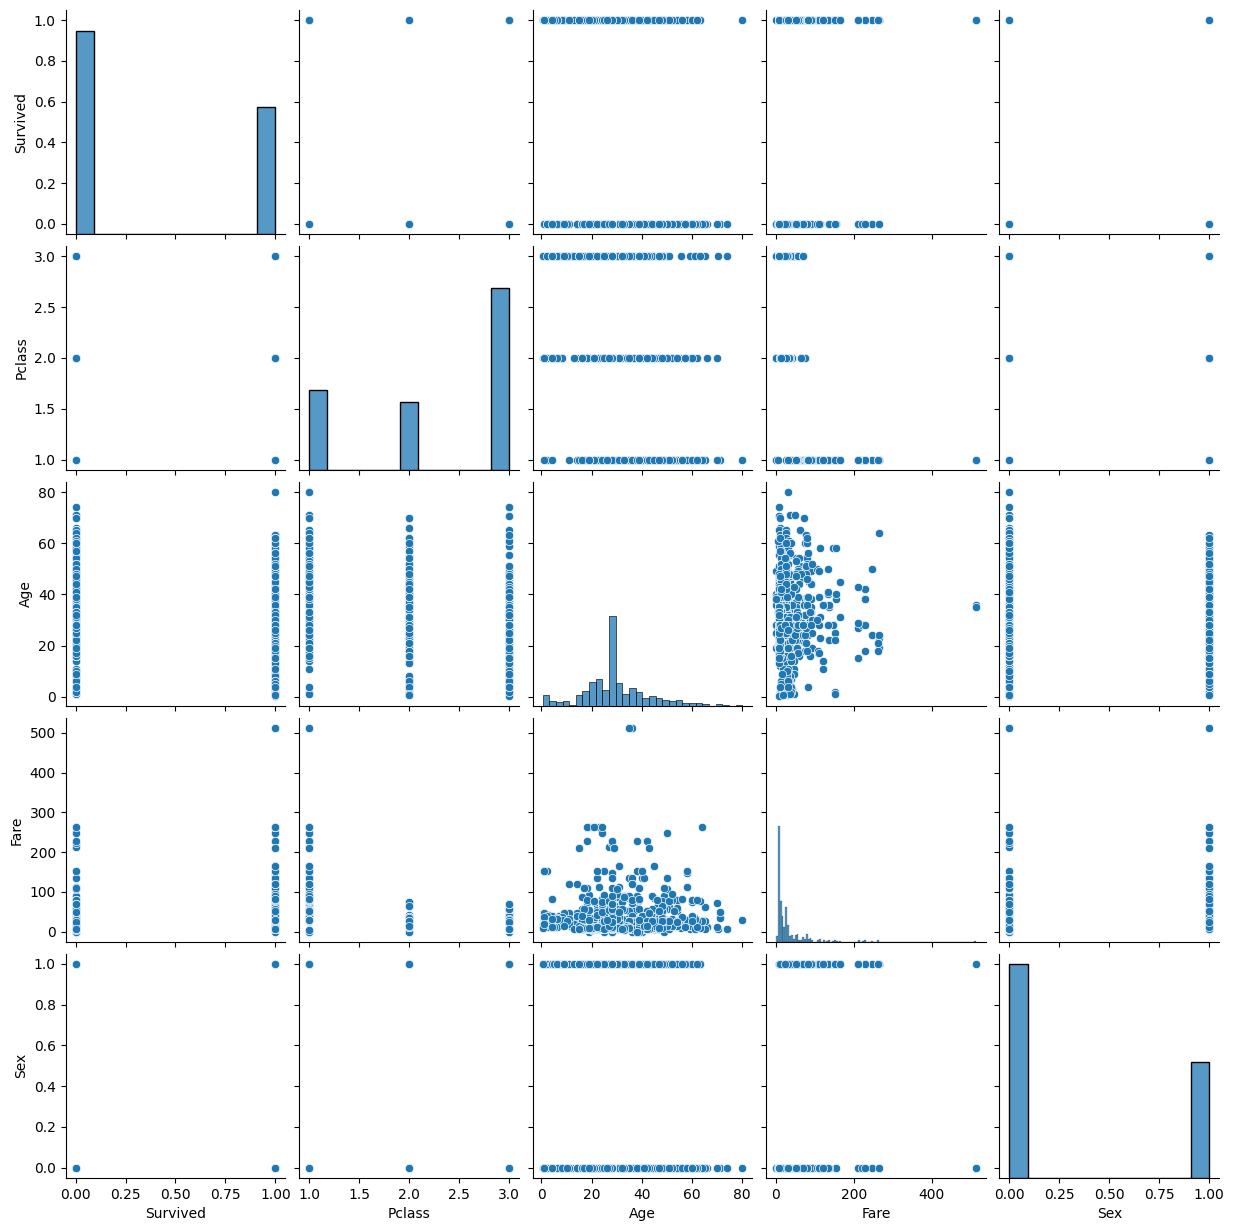

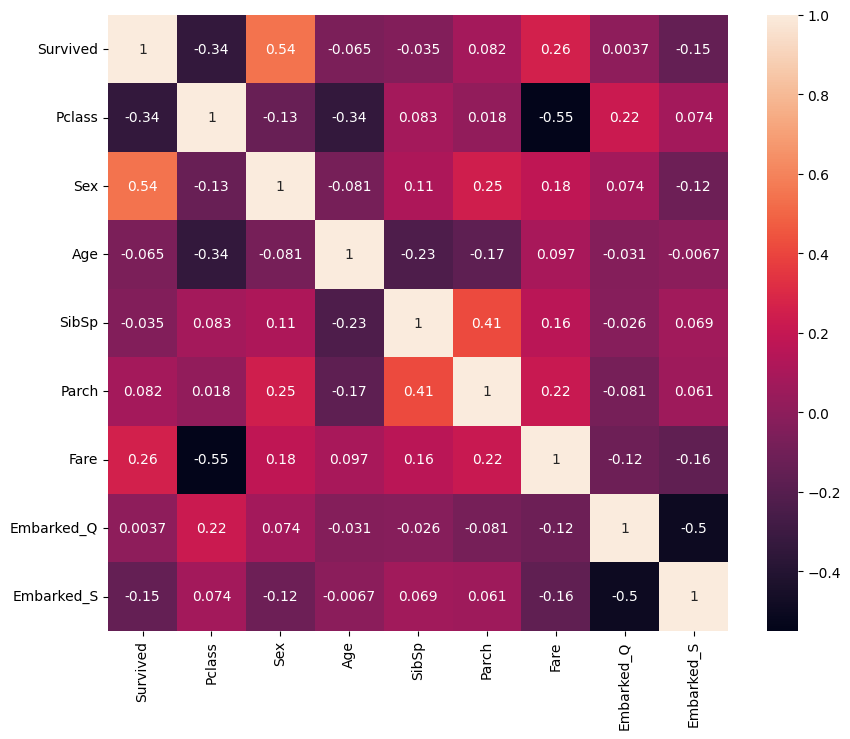

In [ ]:
# Histograms for numerical features
tytanic_train.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 8))
sns.boxplot(data=tytanic_train)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pair plot for selected features
sns.pairplot(tytanic_train[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']])
plt.show()

# correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(tytanic_train.corr(), annot=True)
plt.show()

if we observe the plots we can see there are outliers present in age and fare but they are real so we use log transformation insted of dropping or capping if we see heat map few columns are highly corelated and few are weak correlated then if we see the pair plot it Confirms correlations, shows distributions and there is No strong linear separations — this is okay for logistic regression

now let us perform the vif to spot multicolinearity and drop them

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate features and target
X = tytanic_train.drop('Survived', axis=1)
y = tytanic_train['Survived']

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Pclass,5.795572
1,Sex,1.640027
2,Age,4.438493
3,SibSp,1.572961
4,Parch,1.627665
5,Fare,1.736636
6,Embarked_Q,1.625914
7,Embarked_S,4.783889


as we see the vif values all are below 10 so there is no multi colinearity but if we assume 5 is limit then we can see pclass as a multicolinearity but removing it immediately might cause loss of prediction power so let continue later we see matrics with and with out pclass and pclass and price are highly corelated

# 2. Data Preprocessing:
**a. Handle missing values (e.g., imputation).
b. Encode categorical variables.**
these are done above

# 3. Model Building:

**a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).** and **b. Train the model using the training data.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4. Model Evaluation:

**a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC score: {roc_auc:.4f}")

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-score: 0.7639
ROC-AUC score: 0.8830


**Visualize the ROC curve.**

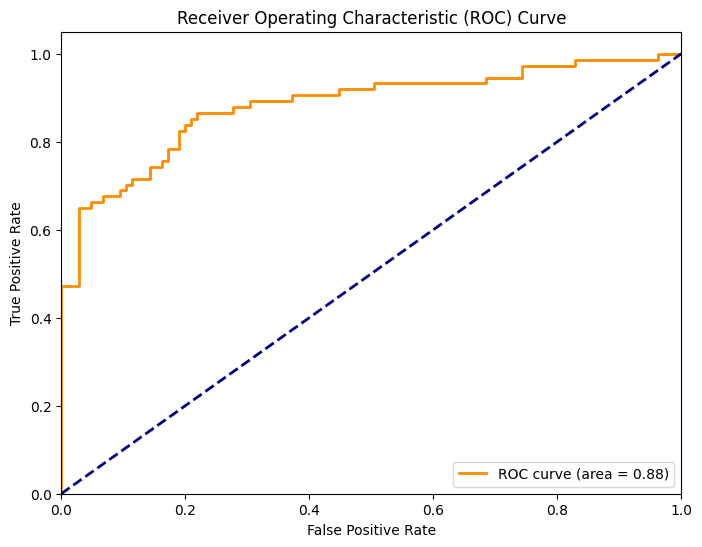

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

so model is predicting well removing p class will be a disaster i have used log other values are decresing and ROC-AUC has increased but for nou we will consider with orginal

# 5. Interpretation:

**a. Interpret the coefficients of the logistic regression model.**

In [ ]:
# Interpret the coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
coefficients['Odds Ratio'] = np.exp(coefficients['coefficient'])
print("\nModel Coefficients and Odds Ratios:")
print(coefficients)

# Interpret the intercept
intercept = model.intercept_[0]
print(f"\nIntercept (log-odds of survival when all features are zero): {intercept:.4f}")
print(f"Odds of survival when all features are zero: {np.exp(intercept):.4f}")
print(f"\nThe intercept of {intercept:.4f} means that when all predictor variables are zero, the log-odds of survival is {intercept:.4f}. The odds of survival in this case is {np.exp(intercept):.4f}.")


Model Coefficients and Odds Ratios:
      feature  coefficient  Odds Ratio
0      Pclass    -0.938257    0.391309
1         Sex     2.590929   13.342161
2         Age    -0.030633    0.969831
3       SibSp    -0.297429    0.742725
4       Parch    -0.105254    0.900096
5        Fare     0.002583    1.002586
6  Embarked_Q    -0.104582    0.900701
7  Embarked_S    -0.395751    0.673174

Intercept (log-odds of survival when all features are zero): 1.9423
Odds of survival when all features are zero: 6.9749

The intercept of 1.9423 means that when all predictor variables are zero, the log-odds of survival is 1.9423. The odds of survival in this case is 6.9749.


**b. Discuss the significance of features in predicting the target variable (survival probability in this case).**

**Highly Significant Predictors**

Sex: By far the strongest predictor (odds ratio = 13.3) — reflects the “women and children first” evacuation protocol.

Pclass: Strong negative effect — higher-class passengers had much higher survival rates.

Embarked_S (moderately): Suggests that people boarding from Southampton had lower survival, likely because it had the most 3rd-class passengers.

**Moderately Important Predictors**

Age: Modest effect; younger people slightly more likely to survive.

SibSp / Parch: Small negative effects; likely non-linear (e.g., having 1 family member might help, but 3+ might hurt).

Fare: Minimal positive effect — might be correlated with Pclass.

**Less Significant Predictors**

Embarked_Q: Very small effect, close to neutral.



now let usprocess the test data align eature with training set and make predictions

In [ ]:
tytanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
tytanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
# Drop unnecessary columns
tytanic_test = tytanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing Age with median (using training data's median)
tytanic_test['Age'] = tytanic_test['Age'].fillna(tytanic_train['Age'].median())

# Fill missing Fare with median (using training data's median)
tytanic_test['Fare'] = tytanic_test['Fare'].fillna(tytanic_train['Fare'].median())


# Convert 'Sex' to numeric
tytanic_test['Sex'] = tytanic_test['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
tytanic_test = pd.get_dummies(tytanic_test, columns=['Embarked'], drop_first=True, dtype = int)

In [ ]:
# Ensure that the test set has the same columns in the same order as the training data (excluding Survived).

# Get the list of columns from the training data (excluding the target variable)
train_cols = [col for col in tytanic_train.columns if col != 'Survived']

# Reindex the test set to match the training set columns
tytanic_test = tytanic_test.reindex(columns=train_cols, fill_value=0)

print("\nTest set columns after alignment:")
print(tytanic_test.columns)
print("\nTest set head after alignment:")
print(tytanic_test.head())


Test set columns after alignment:
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

Test set head after alignment:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  34.5      0      0   7.8292           1           0
1       3    1  47.0      1      0   7.0000           0           1
2       2    0  62.0      0      0   9.6875           1           0
3       3    0  27.0      0      0   8.6625           0           1
4       3    1  22.0      1      1  12.2875           0           1


In [ ]:
# Use your trained logistic regression model to:
# Predict Survived for each test passenger
# Output probabilities (if needed)

# Predict on the test data
test_predictions = model.predict(tytanic_test)
test_probabilities = model.predict_proba(tytanic_test)[:, 1] # Probability of the positive class (survival)

# Output the predictions and probabilities
print("\nPredictions for the test set (0 = Did Not Survive, 1 = Survived):")
print(test_predictions)

print("\nPredicted probabilities of survival for the test set:")
print(test_probabilities)

# Assuming you want to see the predictions with some test features:
test_results = tytanic_test.copy() # Use the processed test set
test_results['Predicted_Survived'] = test_predictions
test_results['Survival_Probability'] = test_probabilities

print("\nTest set with predictions and probabilities:")
print(test_results.head())


Predictions for the test set (0 = Did Not Survive, 1 = Survived):
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]

Predicted probabilities of survival for the test set:
[0.11777556 0.40217911 0.1286

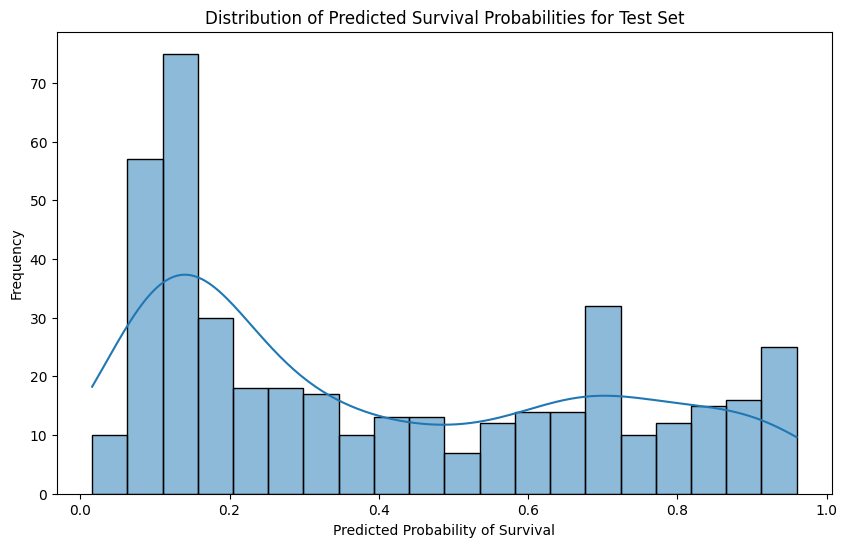

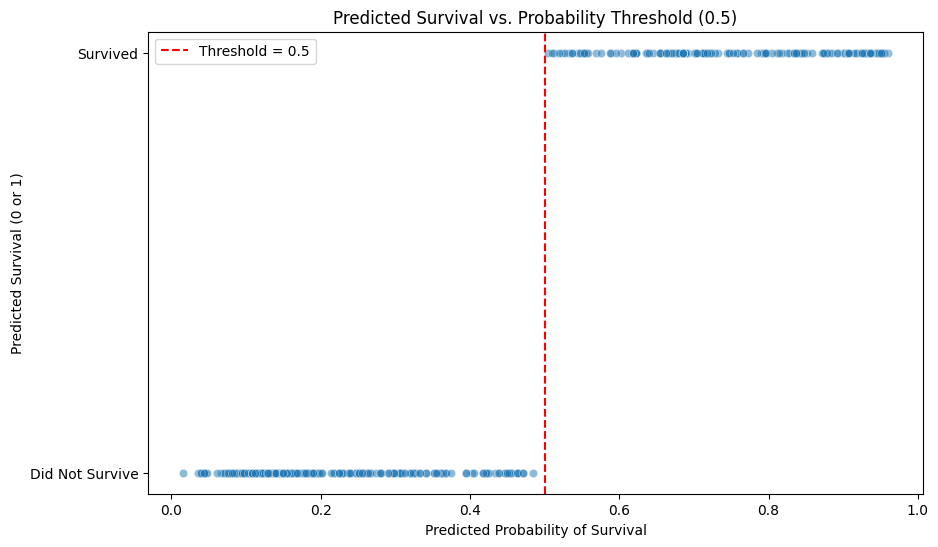

In [ ]:
# Graph of Predicted Survival Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(test_probabilities, bins=20, kde=True)
plt.title('Distribution of Predicted Survival Probabilities for Test Set')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Frequency')
plt.show()

# Optional: Plot actual predictions vs probability threshold (e.g., 0.5)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_probabilities, y=test_predictions, alpha=0.5)
plt.title('Predicted Survival vs. Probability Threshold (0.5)')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Predicted Survival (0 or 1)')
plt.yticks([0, 1], ['Did Not Survive', 'Survived'])
plt.axvline(x=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.show()

we cant use the methods like classification matrics and roc_auc because we dont have the actual survial data

# 6. Deployment with Streamlit:

**In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. **

i was able to gnerste code but facing problem in accessing it it ask pass word to enter with ip address but when i enter it shows enter correct addres iof it is

In [ ]:
# Save the Streamlit app code to a file named 'app.py'
# You can use the %%writefile magic command in Colab
%%writefile app.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import joblib
import streamlit as st

# # 1. Data Exploration:
tytanic_train = pd.read_csv('/content/Titanic_train.csv')
# tytanic_train.head() # Omitted for clarity in the script file
tytanic_test = pd.read_csv('/content/Titanic_test.csv')
# tytanic_test.head() # Omitted for clarity in the script file

# Data cleaning and preprocessing (as done in your original code)
# Drop unnecessary columns
tytanic_train = tytanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
tytanic_test = tytanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


# Fill missing Age with median
tytanic_train['Age'] = tytanic_train['Age'].fillna(tytanic_train['Age'].median())
tytanic_test['Age'] = tytanic_test['Age'].fillna(tytanic_train['Age'].median()) # Use train median for test

# Fill missing Embarked with mode
tytanic_train['Embarked'] = tytanic_train['Embarked'].fillna(tytanic_train['Embarked'].mode()[0])
# No missing Embarked in test, but good practice to handle if any

# Fill missing Fare in test set
tytanic_test['Fare'] = tytanic_test['Fare'].fillna(tytanic_train['Fare'].median()) # Use train median for test


# Convert 'Sex' to numeric
tytanic_train['Sex'] = tytanic_train['Sex'].map({'male': 0, 'female': 1})
tytanic_test['Sex'] = tytanic_test['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
tytanic_train = pd.get_dummies(tytanic_train, columns=['Embarked'], drop_first=True , dtype = int)
tytanic_test = pd.get_dummies(tytanic_test, columns=['Embarked'], drop_first=True , dtype = int)


# Separate features and target for training
X_train = tytanic_train.drop('Survived', axis=1)
y_train = tytanic_train['Survived']

# Ensure that the test set has the same columns in the same order as the training data (excluding Survived).
train_cols = X_train.columns # Get the column names from the training features
tytanic_test = tytanic_test.reindex(columns=train_cols, fill_value=0)


# Build and Train the logistic regression model
# We need to retrain the model here because the Colab runtime might reset
# or if you just run the streamlit part without the training part first.
# It's better to train within the script or load a pre-trained model.
# For simplicity in this executable script, we'll train it.
# If you already saved the model, you could just load it here.
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model for later loading in the Streamlit app part
joblib.dump(model, 'logistic_regression_model.pkl')


# --- Streamlit App Code ---

# Load the trained model
# Ensure the model file exists. This part assumes the training above or
# a previous run has saved the model.
try:
    model = joblib.load('logistic_regression_model.pkl')
except FileNotFoundError:
    st.error("Model file 'logistic_regression_model.pkl' not found. Please run the training code first.")
    st.stop() # Stop the app if the model isn't found


# Define the Streamlit app function
def main():
    st.title("Titanic Survival Predictor")
    st.write("Predict the survival outcome of a passenger based on their characteristics.")

    # Create input widgets for user
    pclass = st.selectbox("Passenger Class", [1, 2, 3])
    sex = st.selectbox("Sex", ["male", "female"])
    age = st.slider("Age", 0.0, 80.0, 30.0)
    sibsp = st.slider("Number of Siblings/Spouses Aboard", 0, 8, 0)
    parch = st.slider("Number of Parents/Children Aboard", 0, 6, 0)
    fare = st.number_input("Fare", value=10.0, min_value=0.0)
    embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

    # Map categorical inputs to model's format
    sex_encoded = 1 if sex == "female" else 0
    # Ensure this matches how you did one-hot encoding in training
    embarked_encoded = {'C': [0, 0], 'Q': [1, 0], 'S': [0, 1]} # Assuming Embarked_Q and Embarked_S were kept

    # Create a feature vector from user inputs
    # The order of features MUST match the training data:
    # Use the column names from the trained model's expected features (X_train.columns)
    feature_names = model.feature_names_in_ # Get feature names from the trained model

    # Construct the input array based on feature_names order
    input_dict = {
        'Pclass': pclass,
        'Sex': sex_encoded,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Embarked_Q': embarked_encoded[embarked][0],
        'Embarked_S': embarked_encoded[embarked][1]
    }

    # Create a DataFrame ensuring the correct order and columns
    input_df = pd.DataFrame([input_dict], columns=feature_names)


    prediction = None
    prediction_proba = None

    # Predict when the user clicks the button
    if st.button("Predict Survival"):
        try:
            prediction = model.predict(input_df)[0]
            prediction_proba = model.predict_proba(input_df)[:, 1][0]

            st.subheader("Prediction")
            if prediction == 1:
                st.success("The passenger is predicted to survive!")
            else:
                st.error("The passenger is predicted to not survive.")

            st.write(f"Probability of survival: {prediction_proba:.4f}")

        except Exception as e:
            st.error(f"An error occurred during prediction: {e}")
            st.error(f"Input DataFrame columns: {input_df.columns.tolist()}")
            st.error(f"Model expected features: {model.feature_names_in_}")


# Run the app
if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com
!streamlit run app.py &>/dev/null&

34.91.209.30


In [ ]:
# prompt: generate public link for streamlit app

!npm install localtunnel
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 2s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴⠙your url is: https://slimy-monkeys-repeat.loca.lt
^C


# Interview Questions:

**1. What is the difference between precision and recall?**

Precision and recall are two important metrics used to evaluate the performance of classification models, especially in the context of imbalanced datasets or information retrieval. Here's the key difference between them:
Here’s the **difference between precision and recall in 4 key points**:

1. **Definition**:

   * **Precision** measures how many selected items are relevant.
   * **Recall** measures how many relevant items are selected.

2. **Formula**:

   * **Precision** = TP / (TP + FP)
   * **Recall** = TP / (TP + FN)
     *(TP = True Positives, FP = False Positives, FN = False Negatives)*

3. **Focus**:

   * **Precision** focuses on **reducing false positives**.
   * **Recall** focuses on **reducing false negatives**.

4. **Use Case Priority**:

   * Use **precision** when false positives are costly (e.g., classifying non-spam as spam).
   * Use **recall** when missing a true case is costly (e.g., detecting cancer).

**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique to evaluate the performance of a machine learning model by splitting the dataset into multiple parts (called folds), training the model on some parts, and testing it on the remaining parts. This process is repeated multiple times to ensure the model's performance is consistent and not dependent on a particular train-test split.  

Why is Cross-Validation Important in Binary Classification?

Reliable Performance Estimate:
It gives a more accurate and unbiased estimate of how well the model generalizes to unseen data, compared to a single train-test split.

Reduces Overfitting Risk:
By testing on multiple different subsets, it helps detect if the model is overfitting (performing well only on training data).

Utilizes Data Efficiently:
Especially important when you have limited data. Cross-validation uses all data points for both training and testing at different iterations.

Better Model Selection and Tuning:
Helps in selecting the best model or hyperparameters by comparing their performance across folds, improving robustness.